# Project Overview


In this project, I revisit a familiar classification problem with a fresh, unsupervised perspective. Previously, I developed a [supervised learning model](https://colab.research.google.com/drive/1CR0VrPrRfng1bHId1PtAxbvdu_IDBOY6?usp=sharing) to help a car repair chain,  *Prospect Auto*, classify three types of vehicles (car, van, and bus) based on geometric features extracted from their silhouettes.

This time, I aim to solve the same problem using Unsupervised Learning techniques—specifically **Principal Component Analysis (PCA)** for dimensionality reduction and clustering algorithms like **K-Means** and **DBSCAN**.

My goal is to investigate whether clustering methods can effectively group these vehicles without prior label knowledge, and to compare the results with the supervised learning approach.

The dataset consists of 18 numerical features derived from the silhouettes of:

* A double-decker bus
*	A Chevrolet van
*	A car (either a Saab 9000 or an Opel Manta)

The dataset can be downloaded [here](https://drive.google.com/file/d/1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3/view).


> This notebook focuses on using **Unsupervised Machine Learning Clustering Algorithms** to compare or complement with Supervised Machine Learning approaches.



To prepare the dataset for unsupervised learning, I started by splitting it into training and testing subsets using an 80/20 split. Since clustering algorithms are sensitive to the scale of input features, I standardized the features using StandardScaler, which transforms the data to have zero mean and unit variance.

The preprocessing steps included:
* Handling missing values
* Splitting the data into features (X) and target labels (y)
* Separating the training and test sets
*	Standardizing the feature values to ensure fair distance calculations during clustering

This setup ensures that any dimensionality reduction or clustering techniques applied next will work with consistent, scale-adjusted data.

---
To solve this classification problem I will conduct the following steps:

*	Use K-Means and DBSCAN clustering to group the data based on silhouette features.
*	Evaluate clustering performance using the silhouette score, which measures how well samples are assigned to clusters.
*	Compare the results with the original supervised classification to determine how effective unsupervised learning is for this problem.


# Key Takeaways

- **`K-Means`** performed **significantly better** than DBSCAN in terms of cluster separation, as reflected by the **Silhouette Score of 0.30**.
  - The model identified **3 clusters**, which aligns with the true number of classes in the dataset (car, van, bus).
  - This suggests that the data is relatively well-separated and that K-Means captured a meaningful structure.

- **`DBSCAN`**, while powerful for detecting differently shaped clusters and noise, **performed poorly in this case**.
  - Its **Silhouette Score of 0.08** indicates that the clusters were not well-defined.
  - Although DBSCAN found 4 clusters, the clustering may have been dominated by noise or uneven density.

---
✅ **Conclusion:**

**`K-Means` appears to be a better fit for this dataset and created
more consistent clusters with better silhouette score. Although it had difficulty capturing the true class structure.**


     Model  Number of Clusters  Silhouette Score
0  K-means                   3              0.30
1   DBSCAN                   4              0.08




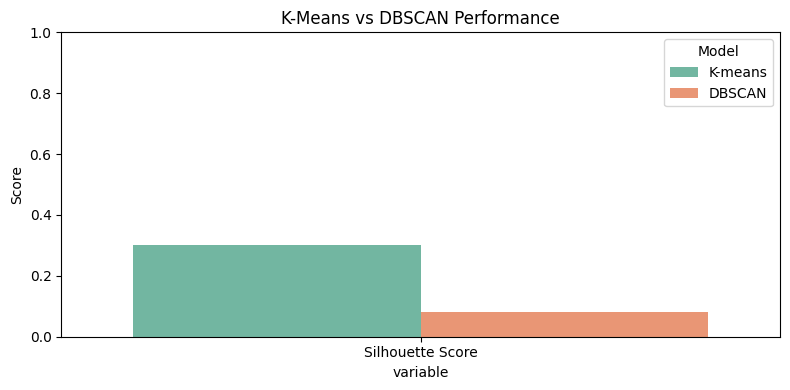

In [2]:
# DataFrame that stores the score and clusters best run K-Means vs DBSCAN
kmeans_metrics = {
    'Model': 'K-means',
    'Number of Clusters': 3,
    'Silhouette Score': 0.30
}

dbscan_metrics = {
    'Model': 'DBSCAN',
    'Number of Clusters': 4,
    'Silhouette Score': 0.08
}

comparison_df = pd.DataFrame([kmeans_metrics, dbscan_metrics])
print(comparison_df)
print("\n")

plot_data = comparison_df[['Model', 'Silhouette Score']].melt(id_vars='Model')
plt.figure(figsize=(8, 4))
sns.barplot(data=plot_data, x='variable', y='value', hue='Model', palette='Set2')
plt.title('K-Means vs DBSCAN Performance')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Supervised vs Unsupervised ML

To evaluate the effectiveness of clustering methods like K-Means and DBSCAN, we compare their results against a supervised learning model trained on the same dataset.

**Supervised Learning Results:**

The best-performing model was `Logistic Regression` with `C`=100 and `max_iter`=150. The model performs excellent across all classes, with particularly high precision and recall.


In [ ]:
# DataFrame that stores Supervised Learning Best Model Result
metric = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
value = [0.9939, 0.99, 1.00, 0.99]

supervised_dict = {
    'Metric': metric,
    'Value': value
}

supervised_df = pd.DataFrame(supervised_dict)
print(supervised_df)

      Metric   Value
0   Accuracy  0.9939
1  Precision  0.9900
2     Recall  1.0000
3   F1-Score  0.9900


In [ ]:
print(comparison_df)

     Model  Number of Clusters  Silhouette Score
0  K-means                   3              0.35
1   DBSCAN                   3              0.03


- Supervised learning significantly outperformed unsupervised clustering.
- The `Logistic Regression` model nearly perfectly predicted class labels, with precision and recall close to 1.00.
- `K-Means clustering` was able to somewhat reflect the true class structure, but not nearly as well.
- `DBSCAN` performed poorly on this dataset (low silhouette score), possibly due to the class imbalance or the feature distribution not forming clear density-based clusters.

✅ **While clustering can be useful for exploratory data analysis or when labels are unavailable, it cannot match the performance of a supervised model trained on labeled data.**

# Liabraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, confusion_matrix, adjusted_rand_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import mode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vehicles = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Classification_Clustering/Vehicle_Machine_Learning_Classification/Data/processed_features_pca.csv')
vehicles = vehicles.values

In [ ]:
print("Vehicle Dataset First Five Rows")
vehicles.head()

Vehicle Dataset First Five Rows


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,0.352249,0.141027,0.961832,-0.190872,0.069616,0.740301,-0.882080
1,-1.578072,0.422197,-0.365261,-0.239334,0.685899,0.530580,0.345639
2,3.782556,-0.253257,0.061756,-1.216416,0.717337,-0.728388,-0.015941
3,-1.713214,2.819496,0.186835,-0.379588,-0.357389,0.514101,0.450872
4,0.532165,-5.153595,11.400516,-0.066717,3.242363,0.360525,2.569695


In [ ]:
print("Rows and Columns:", vehicles.shape)

Rows and Columns: (813, 7)


# **Functions**

To keep my notebook clean and easy to follow, I created reusable functions. This allowed me to avoid repeating code blocks and instead focus on experimentation and interpretation.

In [ ]:
# Function to conduct k-mean clustering and return a visualization of the clusters in 2D
def kmeans_clusters(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(vehicles)

    # Evaluation
    sil_score = silhouette_score(vehicles, kmeans_labels)
    print(f"Evaluation for {n_clusters} clusters")
    print(f"Silhouette Score: {sil_score:.3f}")

    # Visualize Clusters
    plt.figure(figsize=(8,4))
    plt.scatter(vehicles[:, 0], vehicles[:, 1], c=kmeans_labels, cmap='viridis', s=30)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x', s=100, label='Centroids')
    plt.title(f'KMeans Clusters (k={n_clusters})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster Label')
    plt.legend()
    plt.show()

In [ ]:
# Function to conduct DBSCAN and return visualization of the clusters in 2D
def tune_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(vehicles)

    # Evaluation
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Number of clusters: {n_clusters}")
    print(f"Noise points (label -1): {n_noise}")

    if n_clusters > 1:
        sil_score = silhouette_score(vehicles, labels)
        print(f"Silhouette Score: {sil_score:.4f}")
    else:
        print("Silhouette Score: Not applicable (less than 2 clusters)")

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=vehicles[:, 0], y=vehicles[:, 1], hue=labels, palette='viridis', s=100, marker='o')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# K-Means Clustering

To explore the structure of the data through unsupervised learning, I applied `K-Means` clustering. Here's a summary of the steps I followed:

1. **Finding the Optimal Number of Clusters:**
   - I used the *Elbow Method* to determine a suitable number of clusters by plotting the distortion values for different values of `k`.
   - I also evaluated *Silhouette Scores* across a range of `k` values to further assess the quality of clustering at each stage.

2. **Model Iteration and Evaluation:**
   - I selected two values of `k` (3 and 4) for deeper exploration. For each, I trained a K-Means model and:
     - Plotted the resulting clusters in the reduced feature space.
     - Calculated and visualized the *Silhouette Scores* to compare clustering performance.


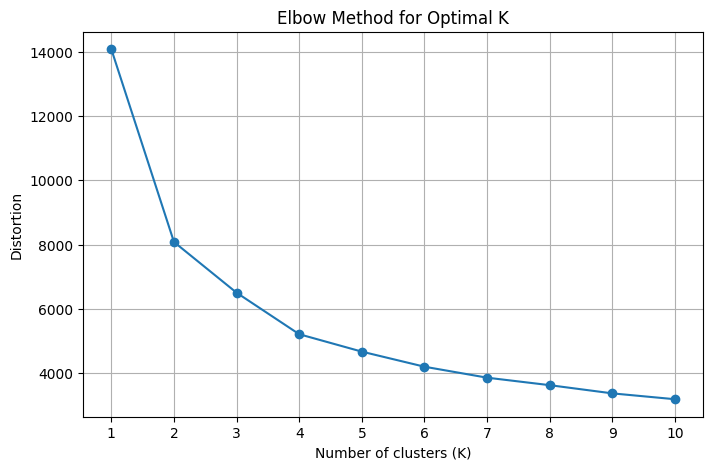

In [ ]:
# Elbow method to find the optimal number of clusters
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(vehicles)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.xticks([i for i in range(1, 11)])
plt.grid(True)
plt.show()

This plot shows the **Elbow Method** used to determine the optimal number of clusters `K`.

The **distortion** (within-cluster sum of squares) decreases sharply from `K=2` to `K=4`.

After `K=4`, the rate of decrease in distortion slows significantly, forming an "elbow" in the curve. Adding clusters beyond `K=4` continues to reduce distortion but at a much slower rate.

`K=4` and `K=3` align with the vehicle dataset, potentially corresponding to natural groupings in the vehicle silhouette data that might represent different vehicle types or subtypes.

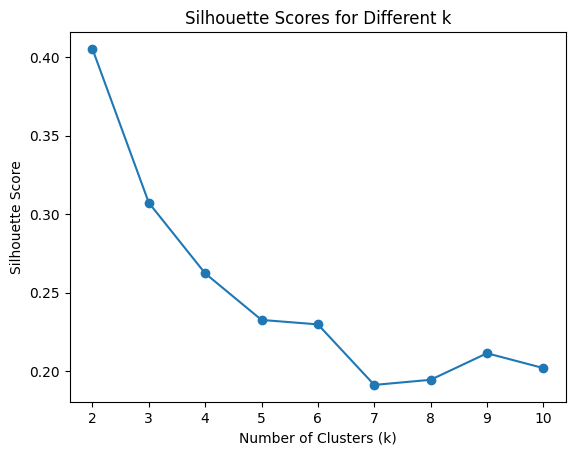

In [ ]:
# Plot the silhouette scores for each k
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vehicles)
    y_pred = kmeans.labels_
    score = silhouette_score(vehicles, y_pred)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

This plot displays **Silhouette Scores for different numbers of clusters**.

The highest silhouette score occurs at `K=2`, indicating that dividing the vehicle data into two clusters produces the most distinct and well-separated groupings.

There is a downward trend as `K` increases, suggesting that adding more clusters generally reduces the quality of the clustering.

The silhouette scores are relatively low overall (below 0.5), indicating that the clusters are not strongly separated regardless of how many clusters are used. This aligns with what we observed in the PCA projection where there was significant overlap between vehicle classes.

While `K=2` provides the best silhouette score, this contradicts the elbow method's suggestion of `K=4` from the previous plot. This highlights the challenge of choosing the optimal number of clusters for this dataset.

Evaluation for 3 clusters
Silhouette Score: 0.307


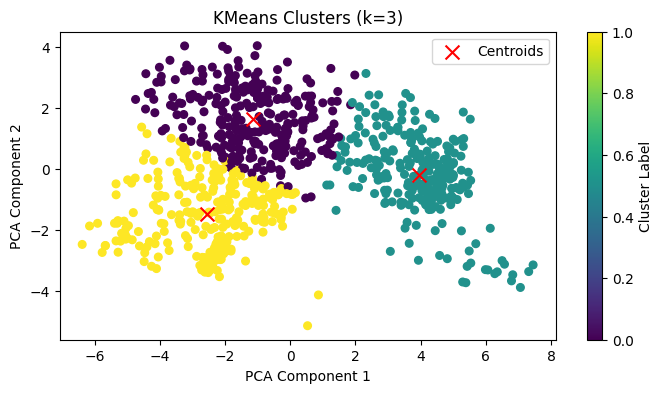

In [ ]:
kmeans_clusters(3)

**This visualization shows the results of K-means clustering, projected onto the first two principal components.**

The clusters have moderate cohesion and separation. The Silhouette Score of 0.30 is higher than what we saw for most K values in the silhouette score plot, except for `K=2` (which had a score around 0.44).

The moderate silhouette score aligns with what we observe visually: there are distinct clusters, but with some overlap areas.

This evaluation confirms that `K=3` is a justifiable choice for clustering this dataset, balancing statistical measures with the known ground truth of the three vehicle categories.

Evaluation for 4 clusters
Silhouette Score: 0.262


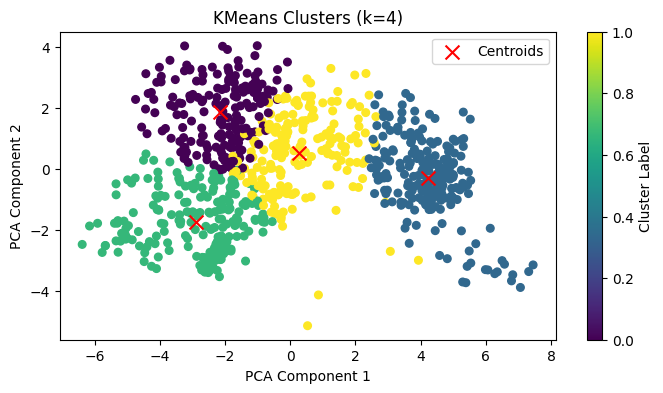

In [ ]:
kmeans_clusters(4)

**This updated visualization shows K-means clustering with K=4.**

The 4-cluster solution has split what appeared to be a single cluster in the 3-cluster model into two separate clusters.

The silhouette score has decreased from 0.30 (for `K=3`) to 0.26 (for `K=4`), confirming that adding this fourth cluster has reduced the overall quality of clustering.

This result is consistent with the elbow method plot we saw earlier. But the lower silhouette score suggests that adding a fourth cluster doesn't improve the clustering quality.

The lower silhouette score also indicates that the 4-cluster solution is creating divisions that may not represent truly distinct natural groupings in the data.

Given that we know there are three vehicle classes (cars, vans, buses) in the dataset, and considering both the visual representation and the decreased silhouette score, the 3-cluster solution appears more appropriate than the 4-cluster solution for this specific vehicle classification task.

✅ **K-means had difficulty capturing the true class structure.**

# DBSCAN

To explore a density-based approach to clustering, I applied **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise). This method is particularly well-suited for discovering clusters of varying shapes and identifying noise points.

1. **Estimating the Optimal Epsilon (`eps`):**
   - I began by plotting a **k-distance graph** to estimate a suitable value for `eps`. This plot helped identify the "elbow" point, which suggests a threshold distance where clusters begin to form.

2. **Initial Model Iteration:**
   - Based on the k-distance graph, I selected 2 as the initial `eps` value and set `min_samples` to 10, following the common rule of thumb (`min_samples` ≈ 2 * number of features, with 5 features in this case).
   - I visualized the clustering results, including the number of clusters formed and the number of noise points.

3. **Parameter Tuning:**
   - I conducted multiple iterations with different `eps` values and `min_samples` values.
   - For each combination, I visualized the resulting clusters and noise points using scatterplots in the reduced feature space.



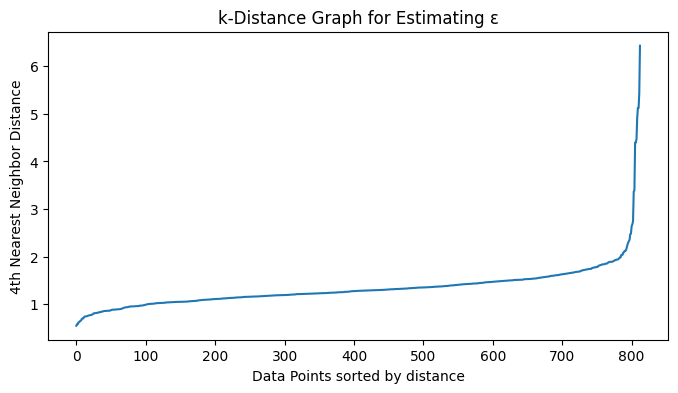

In [ ]:
# Use NearestNeighbors to compute the k-distance
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(vehicles)
distances, indices = neighbors_fit.kneighbors(vehicles)

# Sort distances
distances = np.sort(distances[:, 4], axis=0)

# Plot k-distance graph
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-Distance Graph for Estimating ε")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

The **k-distance graph** demonstrates a noticeable "elbow" point where the curve begins to increase sharply around *y-value 2*. This suggests 2 would be an appropriate initial `eps` value for our clustering algorithm.

Given that our reduced dataset contains 7 features, we will use `min_samples` = 14 as our starting parameter, which is twice the dimensionality of the data.

Number of clusters: 1
Noise points (label -1): 39
Silhouette Score: Not applicable (less than 2 clusters)


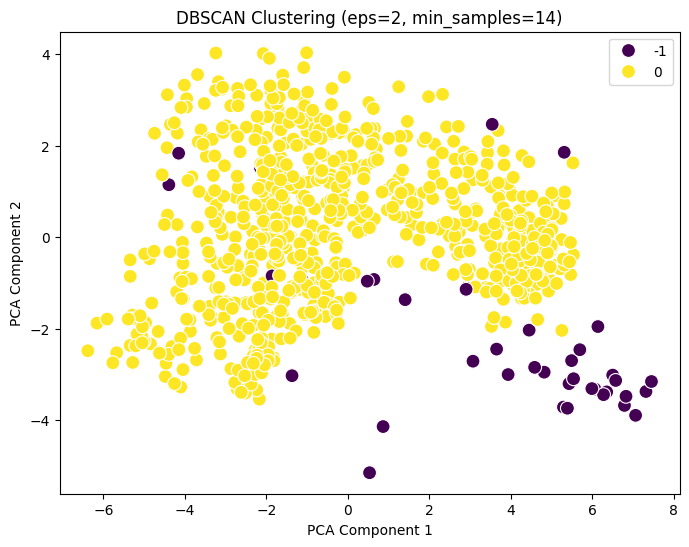

In [ ]:
tune_dbscan(2, 14)

This visualization shows the DBSCAN clustering results with the selected parameters (`eps`=2, `min_samples`=10) applied to data that has been reduced to 2 dimensions using PCA.

It appears that DBSCAN has identified only one primary cluster in this dataset, with several outliers scattered throughout the space.

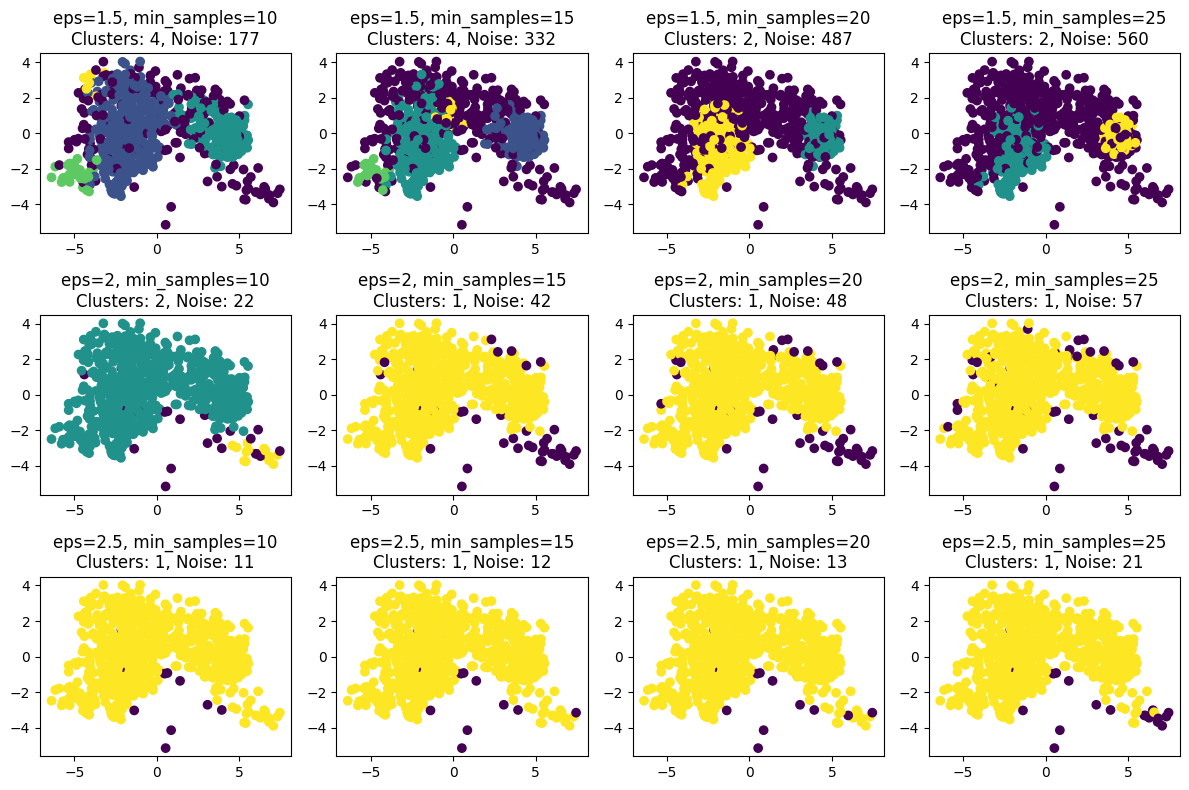

In [ ]:
# Try different DBSCAN parameters
eps_values = [1.5, 2, 2.5, 3]
min_samples_values = [10, 15, 20, 25]

plt.figure(figsize=(12, 8))
plot_num = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        if plot_num <= 12:  # Limit to 12 plots for readability
            # Initialize DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # Fit the model to the data
            dbscan_labels = dbscan.fit_predict(vehicles)

            # Count the number of clusters found (excluding noise)
            n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            n_noise = list(dbscan_labels).count(-1)

            # Plot
            plt.subplot(3, 4, plot_num)
            plt.scatter(vehicles[:, 0], vehicles[:, 1], c=dbscan_labels, cmap='viridis')
            plt.title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters}, Noise: {n_noise}')
            plt.tight_layout()
            plot_num += 1

plt.tight_layout()
plt.show()

This grid visualization shows the parameter sensitivity of DBSCAN clustering across different combinations of `eps` and `min_samples` values.

This visualization demonstrates how critical parameter selection is for DBSCAN. The best results appear to be around `eps`=1.5 with `min_samples`=10, which provides a reasonable number of clusters without excessive noise.

Number of clusters: 4
Noise points (label -1): 177
Silhouette Score: 0.0798


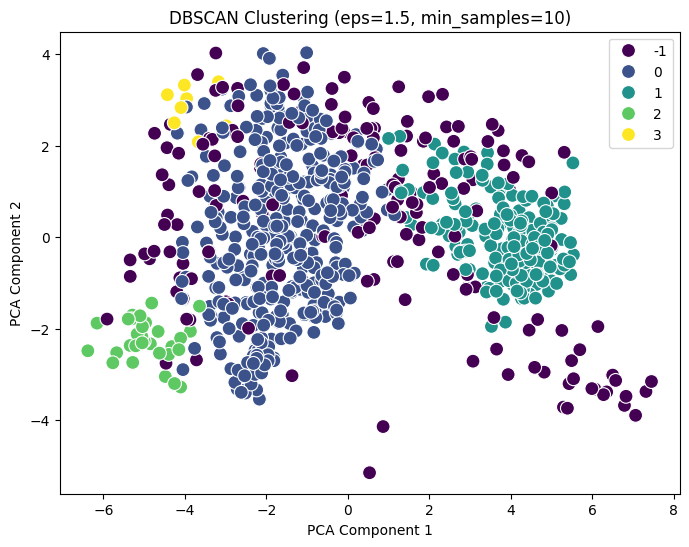

In [ ]:
tune_dbscan(1.5, 10)

Number of clusters: 3
Noise points (label -1): 646
Silhouette Score: -0.1966


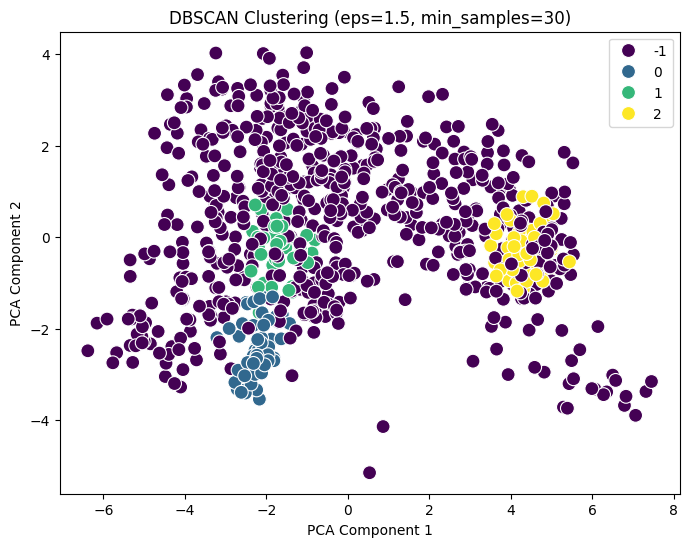

In [ ]:
tune_dbscan(1.5, 30)